## Librerías

In [40]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
#Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics

#Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Datos

In [88]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

In [26]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Primera exploración

In [14]:
df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Las columnas de tipo float poseen nulos y  el sex de tipo object también

In [44]:
df.describe(include='all')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,344.000000,344.000000,344.000000,344.000000,344,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,179,NaN
mean,172.500000,NaN,NaN,43.925000,17.152035,200.892442,4200.872093,NaN,2008.029070
std,99.448479,NaN,NaN,5.443792,1.969060,14.023826,799.696532,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.275000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


- El rowid son puros únicos.
- Las species son la columna target.
- bill_length_mm - bill_depth_mm -> Poseen nulos y una distribución normal, según la media y la mediana. -> aplico la mediana.
- flipper_length_mm	- body_mass_g -> Poseen nulos -> aplico la mediana para imputar dichos valores restantes.
- Island, sex es categórica nominal - > pasara numerica -> sex posee nulos.

In [15]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [16]:
df.duplicated().sum()

0

## Mini - EDA

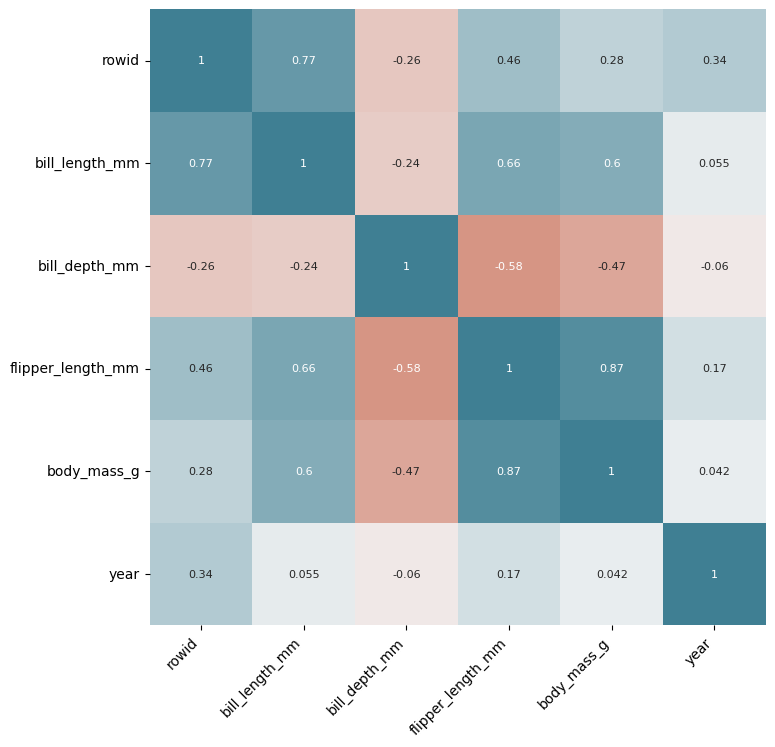

In [17]:
# Heatmap matriz de correlaciones
# ==============================================================================
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

- flipper_lenght_mm - body_mass_g presentan una correlación alta de 0.87

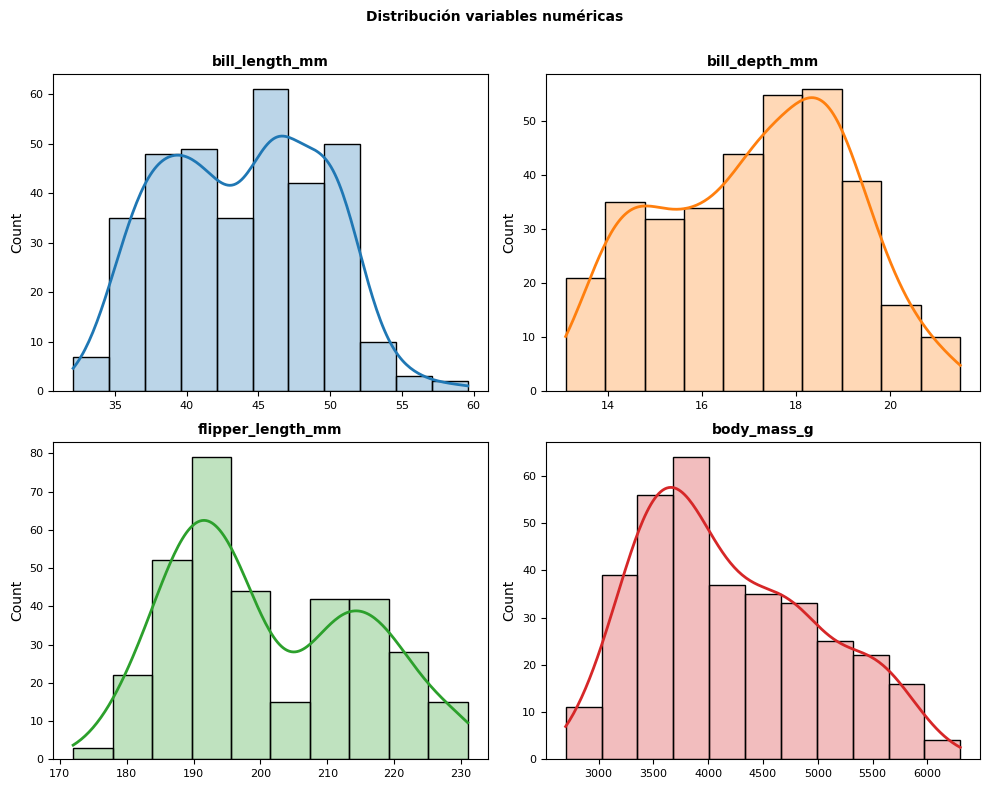

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flat
columnas_numeric = df.loc[:, 'bill_length_mm': 'body_mass_g' ].select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df.loc[:, 'bill_length_mm': 'body_mass_g'],
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

## Tratamiento de missings

In [89]:
mediana_bill_d = df['bill_depth_mm'].median()
df['bill_depth_mm'].fillna(mediana_bill_d, inplace=True)
mediana_bill_l = df['bill_length_mm'].median()
df['bill_length_mm'].fillna(mediana_bill_l, inplace=True)

mediana_flipper = df['flipper_length_mm'].median()
df['flipper_length_mm'].fillna(mediana_flipper , inplace=True)
mediana_body = df['body_mass_g'].median()
df['body_mass_g'].fillna(mediana_body, inplace=True)

moda_sexo = df['sex'].mode() # -> male
df['sex'].fillna('male', inplace=True)

In [90]:
df.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## Dividimos los datos

In [91]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state=24)

In [92]:
X_train, X_val, y_train, Y_val = train_test_split(train_set.drop(columns = 'species'), train_set['species'], test_size= 0.2, random_state = 25)

In [93]:
X_train.head(2)

,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
22,23,Biscoe,35.9,19.2,189.0,3800.0,female,2007
201,202,Biscoe,45.2,15.8,215.0,5300.0,male,2008


In [94]:
col_std = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
col_ohe = ['sex']
col_label = ['island']
y_target = ['species']

In [95]:
# Aplicando StandardScaler
M_m_S = MinMaxScaler()
X_train_sca = pd.DataFrame(M_m_S.fit_transform(X_train[col_std]), columns=col_std, index=X_train.index)
X_val_sca = pd.DataFrame(M_m_S.transform(X_val[col_std]), columns=col_std, index=X_val.index)

# Aplicando OneHot-Encoder
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed_X_train = OHE.fit_transform(X_train[col_ohe])
transformed_df_ohe = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train.index)

X_train_sca_ohe = pd.concat([X_train_sca, transformed_df_ohe], axis=1) # -> df

transformed_X_val = OHE.transform(X_val[col_ohe])
transformed_df_ohe = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_val.index)

X_val_sca_ohe = pd.concat([X_val_sca, transformed_df_ohe], axis=1) # -> df

# X_train = X_train_sca_ohe 
# La columna rowid como son puros nulos, la eliminaré. Year no se sabe que hacer hasta el momento.

c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
# Aplicando OneHot-Encoder
label_enc = LabelEncoder()
transformed_X_train_label = pd.DataFrame(label_enc.fit_transform(X_train[col_label]), index=X_train.index).rename(columns={0: "island"})
X_train_sca_label = pd.concat([X_train_sca_ohe, transformed_X_train_label], axis=1) # -> df

transformed_X_val_label = pd.DataFrame(label_enc.transform(X_val[col_label]), index=X_val.index).rename(columns={0: "island"})
X_val_sca_label = pd.concat([X_val_sca_ohe, transformed_X_val_label], axis=1) # -> df

c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [97]:
X_train_sca_label

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island
22,0.105660,0.753086,0.288136,0.305556,1.0,0.0,0
201,0.456604,0.333333,0.728814,0.722222,0.0,1.0,0
321,0.667925,0.666667,0.491525,0.486111,0.0,1.0,1
113,0.343396,0.790123,0.423729,0.437500,0.0,1.0,0
153,0.637736,0.395062,0.983051,0.833333,0.0,1.0,0
...,...,...,...,...,...,...,...
302,0.656604,0.654321,0.474576,0.194444,1.0,0.0,1
181,0.637736,0.271605,0.813559,0.791667,0.0,1.0,0
209,0.467925,0.234568,0.813559,0.638889,0.0,1.0,0
122,0.267925,0.481481,0.067797,0.208333,1.0,0.0,2


In [98]:
y_train = y_train.map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap' : 2})
y_val = Y_val.map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap' : 2})

# label_enc = LabelEncoder()
# y_train = label_enc.fit_transform(y_train)
# Y_val = label_enc.transform(Y_val)

In [100]:
resultados = cross_val_score(LogisticRegression(), X_train_sca_label, y_train, cv=3, scoring='accuracy').mean()
resultados

0.9817968653585091

In [101]:
lg_rg = LogisticRegression()
lg_rg.fit(X_train_sca_label, y_train) #-> lo tengo que unir
predicc = lg_rg.predict(X_val_sca_label)
print(metrics.accuracy_score(y_val,predicc))
metrics.confusion_matrix(y_val,predicc)

0.9636363636363636


array([[25,  0,  0],
       [ 0, 20,  0],
       [ 2,  0,  8]], dtype=int64)

In [ ]:
model = LogisticRegression()
model.fit(X_train_sca_label, y_train)

In [ ]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

In [ ]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

In [ ]:
c_matrix = confusion_matrix(Y_test, predictions)
import seaborn as sns
sns.heatmap(c_matrix, annot=True);